### Data Exploration

In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from PIL import Image

data_dir = "data"

In [5]:
# Klassen & Anzahl Bilder pro Klasse
class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name)))
                for class_name in os.listdir(data_dir)}

for cls, count in class_counts.items():
    print(f"{cls}: {count} Bilder")

Burrito: 204 Bilder
Muffin: 3705 Bilder
Hot dog: 388 Bilder


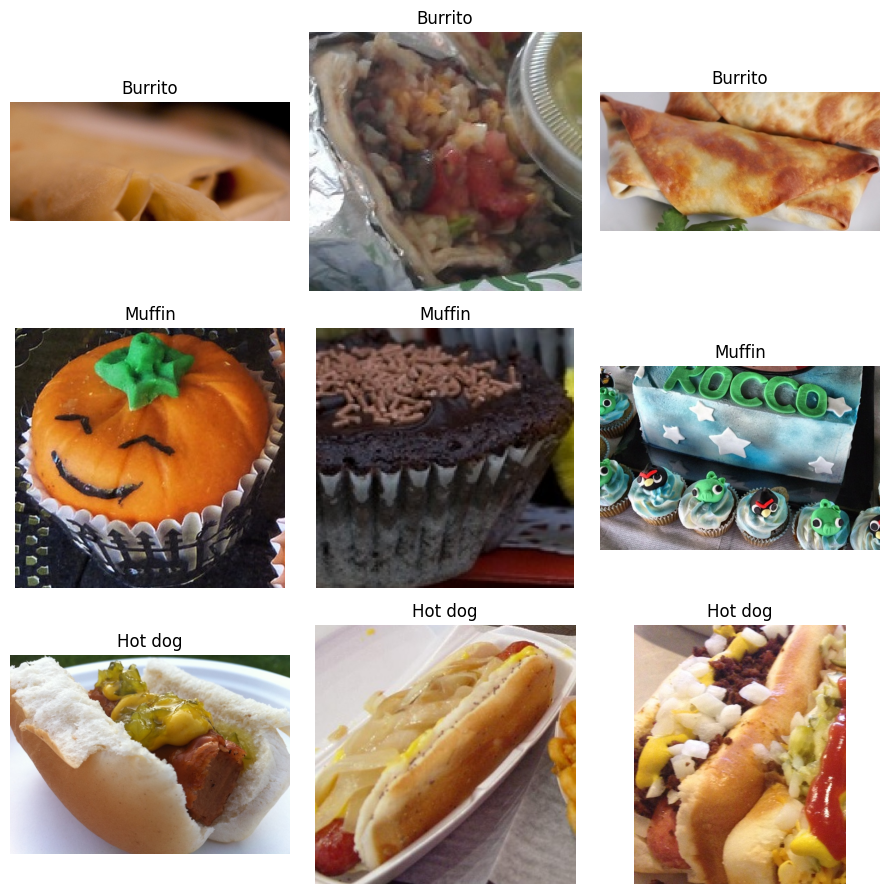

In [6]:
def show_random_images(data_dir, classes, n=3):
    plt.figure(figsize=(n * 3, len(classes) * 3))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        samples = random.sample(images, min(n, len(images)))
        for j, img_file in enumerate(samples):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path)
            plt.subplot(len(classes), n, i * n + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(class_name)
    plt.tight_layout()
    plt.show()

show_random_images(data_dir, list(class_counts.keys()), n=3)

In [8]:
from collections import Counter

size_counter = Counter()

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            size_counter[img.size] += 1  # (width, height)
        except:
            continue

# Top 10 häufigste Größen
print("Top Bildgrößen:")
for size, count in size_counter.most_common(10):
    print(f"{size}: {count} Bilder")

Top Bildgrößen:
(1023, 767): 15 Bilder
(1022, 1022): 9 Bilder
(1023, 682): 7 Bilder
(1022, 767): 6 Bilder
(1023, 680): 6 Bilder
(1022, 766): 5 Bilder
(767, 1023): 5 Bilder
(1023, 1023): 5 Bilder
(766, 766): 3 Bilder
(215, 211): 3 Bilder
